## Hypothesis Testing


1.   Null Hypothesis - stock price series is stationary
2.   Alteranate Hypothesis - Not stationary



In [84]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('apple_all_data.csv')

In [66]:
df.head(3)

,open,high,low,last,close,volume,date,symbol,exchange
0,191.510,191.510,191.510,NaN,191.51,NaN,2018-06-09T00:00:00+0000,AAPL,IEXG
1,191.390,191.995,191.385,NaN,191.51,NaN,2018-06-08T23:00:00+0000,AAPL,IEXG
2,191.135,191.535,191.130,NaN,191.38,NaN,2018-06-08T22:00:00+0000,AAPL,IEXG


In [67]:
df.index = df['date']
df.index = pd.to_datetime(df.index)

In [68]:
df = df.drop(columns=['date'])

In [69]:
df.head(3)

,open,high,low,last,close,volume,symbol,exchange
date,,,,,,,,
2018-06-09 00:00:00+00:00,191.510,191.510,191.510,NaN,191.51,NaN,AAPL,IEXG
2018-06-08 23:00:00+00:00,191.390,191.995,191.385,NaN,191.51,NaN,AAPL,IEXG
2018-06-08 22:00:00+00:00,191.135,191.535,191.130,NaN,191.38,NaN,AAPL,IEXG


<ipython-input-70-f04ca4061fad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('M').mean()['open']['2020-09-15':].plot()


<Axes: xlabel='date'>

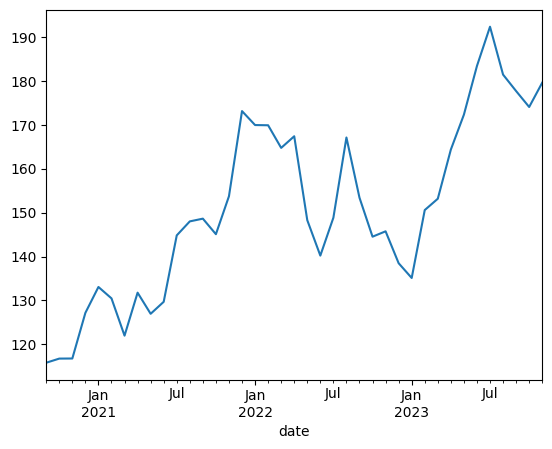

In [70]:
df.resample('M').mean()['open']['2020-09-15':].plot()

In [71]:
stats_ct, p_ct, lags_ct, critical_values_ct = kpss(df['open'], regression='ct')

<ipython-input-71-e015634530ed>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats_ct, p_ct, lags_ct, critical_values_ct = kpss(df['open'], regression='ct')


In [72]:
print(f'Test Statistics: {stats_ct}')
print(f'p-value: {p_ct}')
print(f'Critial Values: {critical_values_ct}')

Test Statistics: 0.7312319925390175
p-value: 0.01
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [73]:
if p_ct < 0.05:
    print(f'Reject the null hypothesis. The time series is likely non-stationary.')
else:
    print(f'Fail to reject the null hypothesis. The time series is likely stationary.')

Reject the null hypothesis. The time series is likely non-stationary.


In [74]:
df = df['2020-09-15':]

<ipython-input-74-f525c12d6c13>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df['2020-09-15':]


In [75]:
df = df.resample('D').mean()

<ipython-input-75-b2a71f0fdeef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('D').mean()


In [76]:
df.isna().sum()

open      219
high      219
low       219
last      322
close     322
volume    322
dtype: int64

In [80]:
df = df.fillna(method='bfill')

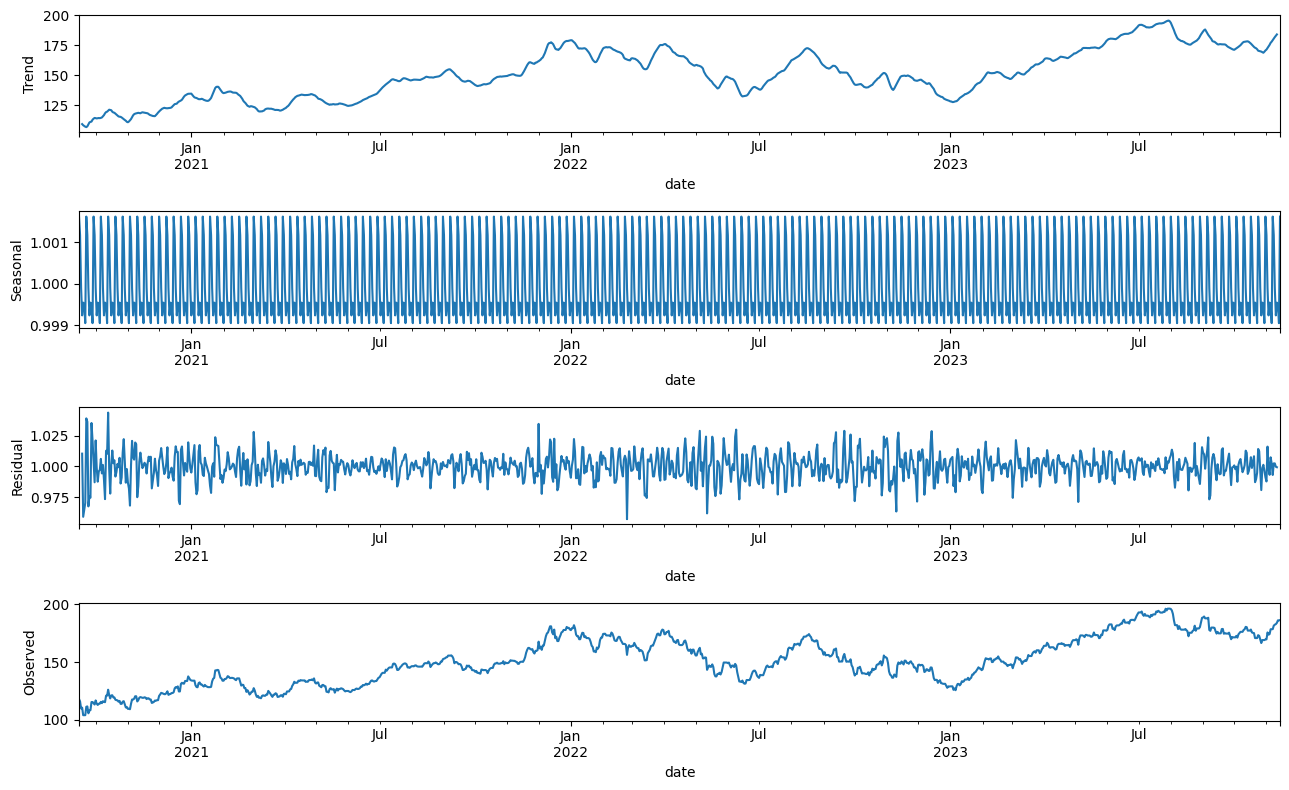

In [88]:

res = sm.tsa.seasonal_decompose(df['open'],
                                model='multiplicative')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13, 8))  # Adjust the width and height as needed


res.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')

res.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')

res.resid.plot(ax=ax3)
ax3.set_ylabel('Residual')

res.observed.plot(ax=ax4)
ax4.set_ylabel('Observed')

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='date'>

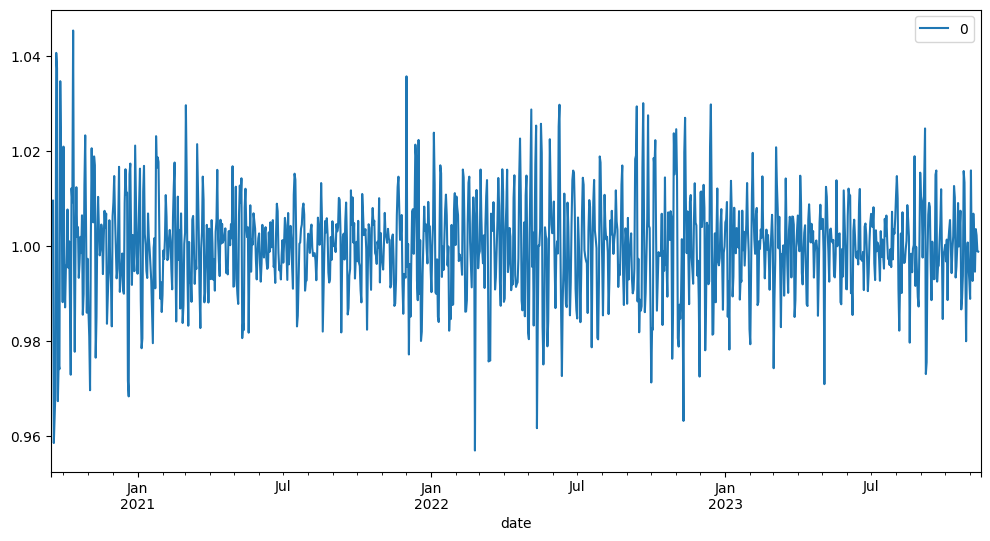

In [92]:

pd.DataFrame(res.observed/res.trend).plot(figsize=(12,6))